In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
data=pd.read_csv("G:\Tesla_Stock_Analysis\TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data.shape

(2416, 7)

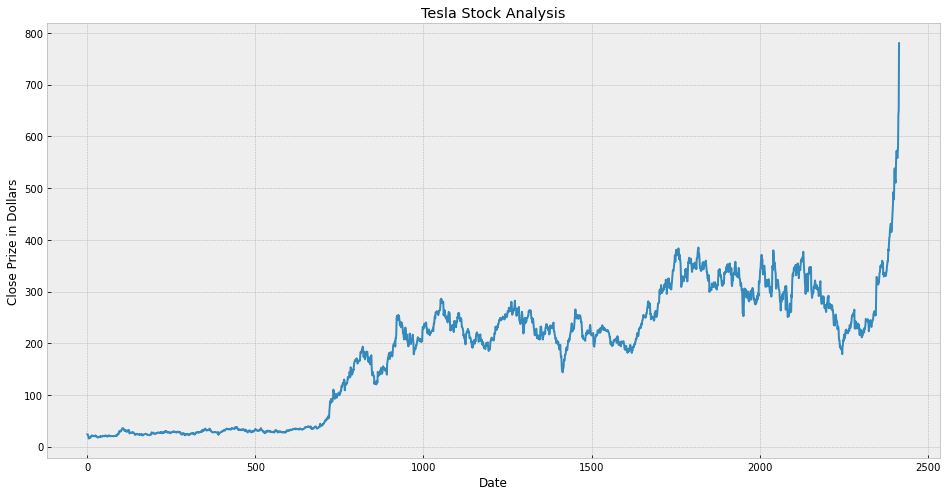

In [5]:
plt.figure(figsize=(16,8))
plt.title("Tesla Stock Analysis")
plt.xlabel('Date')
plt.ylabel("Close Prize in Dollars")
plt.plot(data["Close"])
plt.show()

In [6]:
data=data[["Close"]]
data.head()


,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


In [7]:
future=25
data["Prediction"]=data[["Close"]].shift(-future)
data.tail()

,Close,Prediction
0,23.889999,21.260000
1,23.830000,20.450001
2,21.959999,19.590000
3,19.200001,19.600000
4,16.110001,19.030001


In [16]:
x=np.array(data.drop(["Prediction"],1))[:-future]
print(x)


[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [419.220001]
 [425.25    ]
 [430.940002]]


In [17]:
y=np.array(data["Prediction"])[:-future]
print(y)

[ 21.26      20.450001  19.59     ... 640.809998 650.570007 780.      ]


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [22]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [24]:
x_future=data.drop(["Prediction"],1)[:-future]
x_future=x_future.tail(future)
x_future=np.array(x_future)
x_future

array([[352.220001],
       [354.829987],
       [333.040009],
       [336.339996],
       [328.920013],
       [331.290009],
       [329.940002],
       [334.869995],
       [336.200012],
       [333.029999],
       [330.369995],
       [335.890015],
       [339.529999],
       [348.839996],
       [352.700012],
       [359.679993],
       [358.390015],
       [381.5     ],
       [378.98999 ],
       [393.149994],
       [404.040009],
       [405.589996],
       [419.220001],
       [425.25    ],
       [430.940002]])

In [26]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[419.220001 304.390015 478.149994 323.660004 344.570007 451.540009
 469.059998 492.140015 481.339996 478.149994 469.059998 537.919983
 518.5      513.48999  339.600006 347.26001  344.970001 572.200012
 564.820007 337.019989 566.900024 580.98999  640.809998 780.
 780.      ]

[356.26473663 358.85389897 337.2377713  340.51142951 333.1506465
 335.5017336  334.16249757 339.05315684 340.37256237 337.22784117
 334.58905989 340.06503866 343.67598122 352.91169884 356.74091788
 363.66520943 362.38552346 385.31112651 382.82114251 396.86817157
 407.67130109 409.20892159 422.73018023 428.71206916 434.35667375]


<ipython-input-37-eb11d5c15599>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


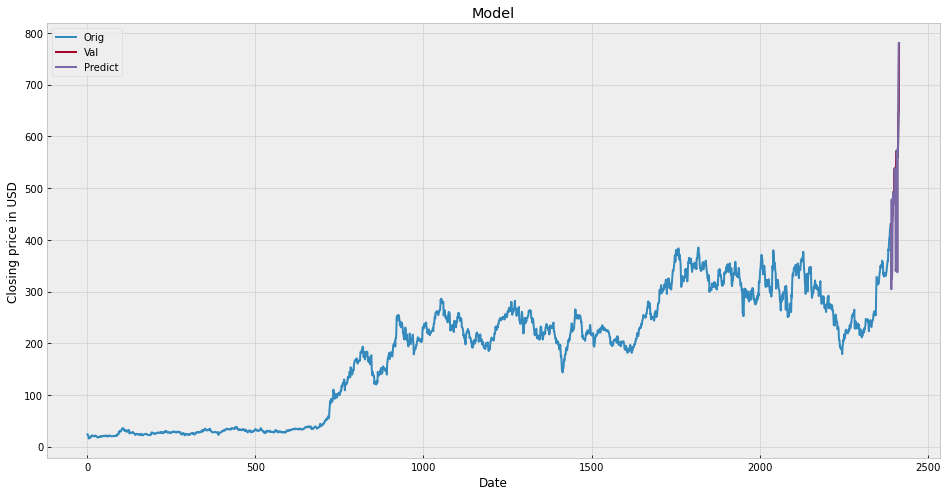

In [37]:
Predictions=tree_prediction
valid=data[x.shape[0]:]
valid['Predictions']=Predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Predict'])
plt.show()


<ipython-input-38-d348eb680c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=Predictions


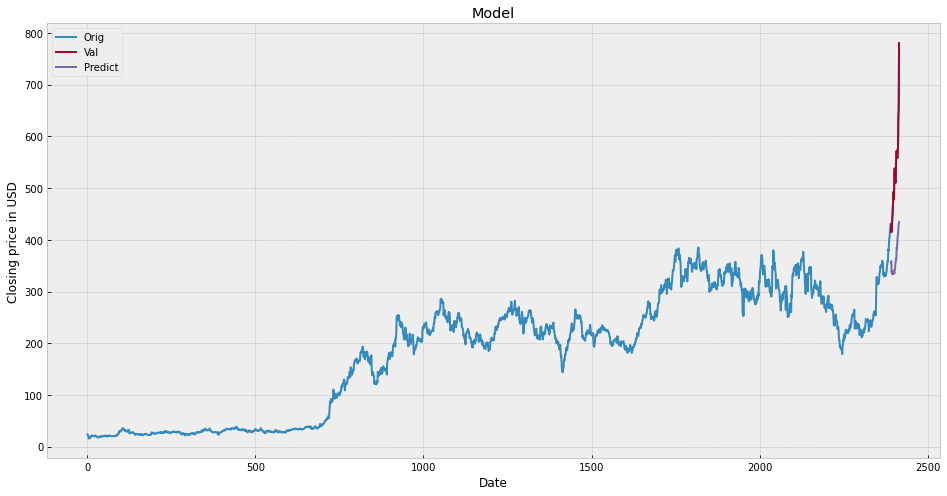

In [38]:
Predictions=lr_prediction
valid=data[x.shape[0]:]
valid['Predictions']=Predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Predict'])
plt.show()